In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
adres = "/workspace/DeepLearningFundamentals/Dokumanlar/01_Preprocessing/data/diabetes.csv"
df = pd.read_csv(adres)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


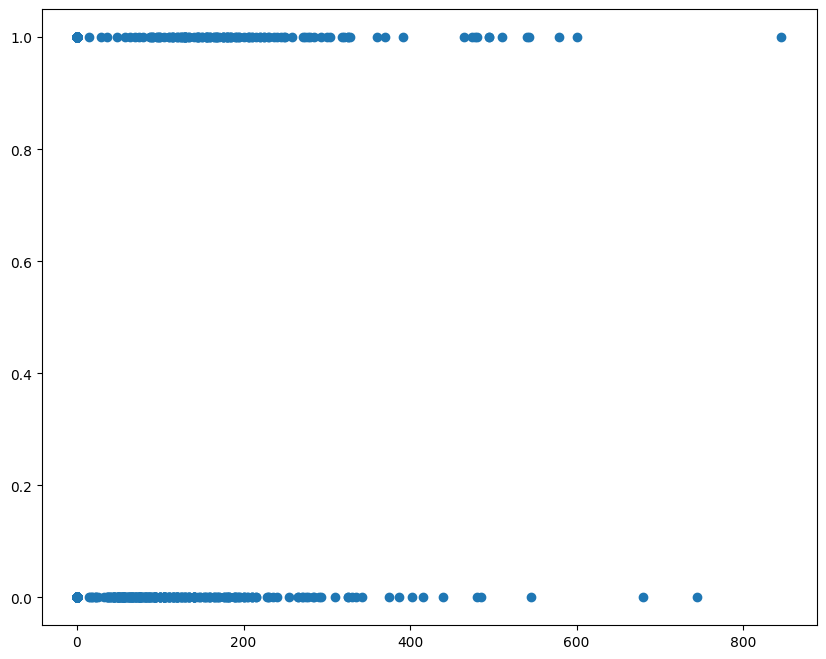

In [5]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(df["Insulin"],df["Outcome"])

<Axes: >

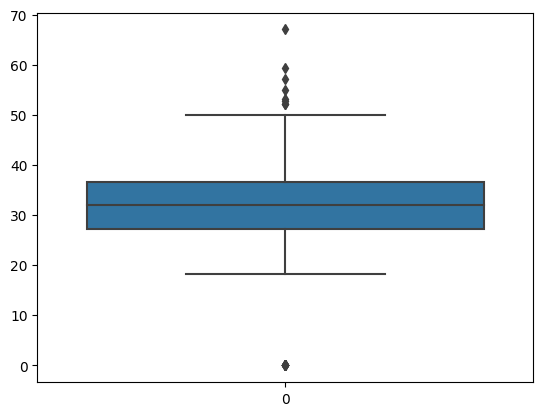

In [7]:
sns.boxplot(df["BMI"])

In [8]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out,len(out),sep="\n")
iqr_outliers(df['BMI'])

Outliers:
[0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
19


In [13]:
out=[]
import scipy.stats as stats
stats.median_abs_deviation
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out,len(out),sep="\n")
ZRscore_outlier(df['BMI'])

Outliers:
[0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
17
